#**Senior Project**

#step1: Loading our dataset



#Loading data




#*   This dataset is the "Car_donation data" start around 1980 to 2023.....

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip freeze > requirements.txt

In [ ]:
#Importing the require library
import os
import numpy as np
import pandas as pd
import os
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from scipy.stats import boxcox
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


In [ ]:
# step 1: getting the datasets
#from google.colab import files
#uploaded=files.upload()

# then we are using pandas to read the csv
#import pandas as pd
car_donation=pd.read_csv('/content/drive/MyDrive/datas/_Car_Donation_Version7 - Raw Detail (1).csv')
# we are checking the head of the car donation, checking the first 10 rows
car_donation.head(10)

,operation,id,status,Sold_Year,Sold_month,Sold_Yearmonth,Donation_date,time,name,car_year,...,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,kbb,dmvMarketValue,useTax,buyItNowPrice,specialPrice,data_refresh_time
0,SF,1.0,11.0,2021.0,1.0,2021-01,2020/08/07,NaN,Chung Pei Chen,2011.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
1,SF,2.0,11.0,2020.0,11.0,2020-11,2020/10/31,4:00 PM,CHENH CARSON,2003.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
2,SF,3.0,11.0,2020.0,11.0,2020-11,2020/10/31,3:00 PM,Fuchun Wang,2001.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
3,SF,4.0,11.0,2020.0,11.0,2020-11,2020/11/01,11:30 PM,CHEN LEI,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
4,SF,5.0,11.0,2020.0,11.0,2020-11,2020/11/01,4:00 PM,MINGLANG HU,1999.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
5,SF,6.0,11.0,2020.0,11.0,2020-11,2020/11/01,1:30 PM,LI CHUAN,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
6,SF,7.0,11.0,2020.0,12.0,2020-12,2020/11/02,NaN,Shing Hing Inc,1998.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
7,SF,8.0,11.0,2020.0,11.0,2020-11,2020/11/03,11:00 PM,Fan Yong Fa,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
8,SF,9.0,11.0,2020.0,11.0,2020-11,2020/11/04,2~3pm,Sim Hubert Y,2004.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
9,SF,10.0,11.0,2020.0,11.0,2020-11,2020/11/03,1:30 PM,Hing Yungwi,2013.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56


Check Data at first sight

In [ ]:
# then we wish to have a detail summary of the datasets
car_donation.describe()

,id,status,Sold_Year,Sold_month,car_year,cost,Direct cost,cost type,Cost subtype,complain,plateNew,categoryColor,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,dmvMarketValue,buyItNowPrice,specialPrice
count,1196.000000,1196.000000,1098.000000,1098.000000,1188.000000,121.000000,0.0,0.0,0.0,0.0,0.0,1196.000000,0.0,1196.000000,1196.0,0.0,4.00000,0.0,0.0
mean,541.401338,10.366221,2021.234062,6.310565,2001.547138,58.495868,NaN,NaN,NaN,NaN,NaN,0.047659,NaN,0.015886,0.0,NaN,2400.00000,NaN,NaN
std,329.939768,2.244024,0.604485,3.494637,5.052576,93.473002,NaN,NaN,NaN,NaN,NaN,0.368513,NaN,0.125088,0.0,NaN,864.09876,NaN,NaN
min,1.000000,1.000000,2018.000000,1.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1600.00000,NaN,NaN
25%,264.750000,11.000000,2021.000000,3.000000,1999.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1900.00000,NaN,NaN
50%,521.500000,11.000000,2021.000000,6.000000,2002.000000,35.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2200.00000,NaN,NaN
75%,824.250000,11.000000,2022.000000,9.000000,2005.000000,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2700.00000,NaN,NaN
max,1123.000000,12.000000,2022.000000,12.000000,2016.000000,710.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,1.000000,0.0,NaN,3600.00000,NaN,NaN


In [ ]:
# the columns's dtypes
car_donation.dtypes

operation             object
id                   float64
status               float64
Sold_Year            float64
Sold_month           float64
                      ...   
dmvMarketValue       float64
useTax                object
buyItNowPrice        float64
specialPrice         float64
data_refresh_time     object
Length: 72, dtype: object

In [ ]:
car_donation['price']=car_donation['price'].str.replace(',','')
car_donation.price=car_donation.price.astype(float)
car_donation['mileage']=car_donation['mileage'].str.replace(',','')
car_donation['mileage'] = pd.to_numeric(car_donation['mileage'],errors='coerce')

# Main Focus:  Is there a chance that different people who repair the car tend to have a different price for selling that car?

In [ ]:
car_donation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   operation            1196 non-null   object 
 1   id                   1196 non-null   float64
 2   status               1196 non-null   float64
 3   Sold_Year            1098 non-null   float64
 4   Sold_month           1098 non-null   float64
 5   Sold_Yearmonth       1098 non-null   object 
 6   Donation_date        1191 non-null   object 
 7   time                 1093 non-null   object 
 8   name                 1170 non-null   object 
 9   car_year             1188 non-null   float64
 10  make                 1187 non-null   object 
 11  model                1173 non-null   object 
 12  mileage              1100 non-null   float64
 13  plate                1152 non-null   object 
 14  vin                  1169 non-null   object 
 15  phone                1184 non-null   o

# Fit an simple XGB boost model

In [ ]:
!pip install statsmodels

In [ ]:
# import the require library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import seaborn as sns


# We are only select the relevant columns
columns_to_predict =['Sold_Year','Sold_month', 'car_year', 'mileage']
# define the independent variable
independent_variables = car_donation[columns_to_predict].fillna(0)
# define the dependent variable
dependent_variable = car_donation['price'].fillna(0)
# next, we are splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    independent_variables, dependent_variable, test_size=0.2, random_state=42
)
# We are Creating and fit the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
# Next, we are making the predictions on the test set
y_pred = xgb_model.predict(X_test)
# We are Calculate Mean Squared Error as an example metric
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# We also print the important features if needed
feature_importances = pd.DataFrame(
    {"Feature": columns_to_predict, "Importance": xgb_model.feature_importances_}
)
print("Feature Importances")
print(feature_importances)

Mean Squared Error: 2643878.0414069644
Feature Importances
      Feature  Importance
0   Sold_Year    0.450161
1  Sold_month    0.183668
2    car_year    0.205553
3     mileage    0.160618


# We are ready to vosualized the prediction results

# We are doing scatter plot

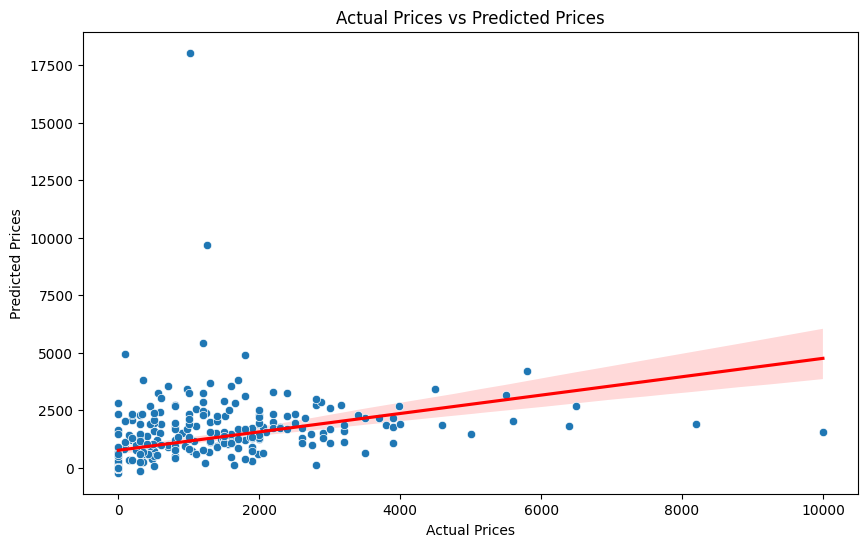

In [ ]:
# creating a Scatter plot for actual vs. predicted prices
plt.figure(figsize=(10, 6))
# We need to add trendline
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20}, line_kws={'color': 'red'})
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# We also wish to make an feature importances bar plot

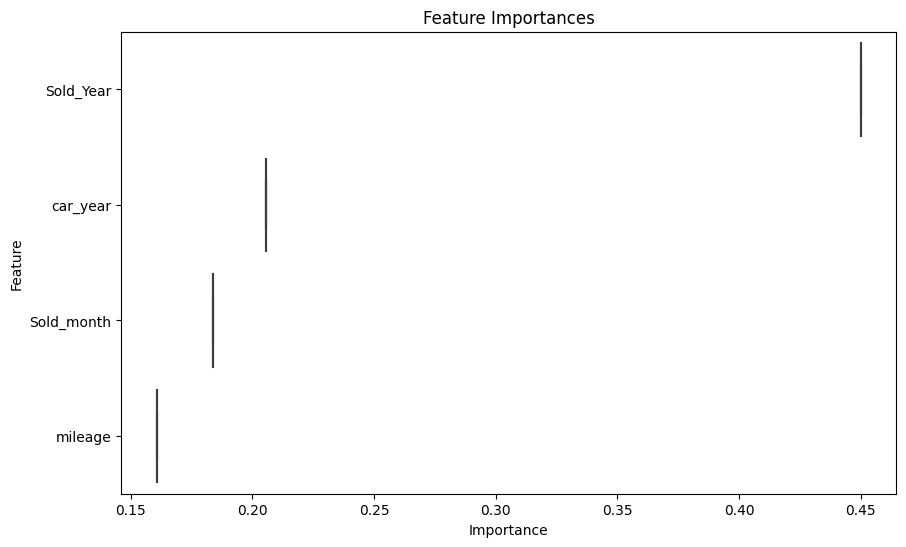

In [ ]:
feature_importances = pd.DataFrame(
    {"Feature": columns_to_predict, "Importance": xgb_model.feature_importances_}
)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Importance', y='Feature', data=feature_importances.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances')
plt.show()

# We are generate the residual plot

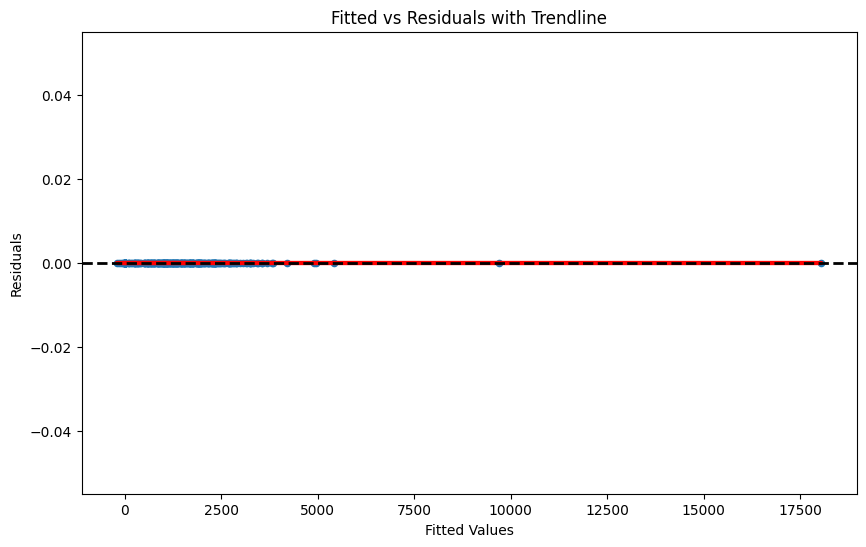

In [ ]:
# We first Calculate the residuals
residuals = y_test - y_test
# We are Fitting a linear regression model to residuals
residuals_model = LinearRegression()
residuals_model.fit(y_pred.reshape(-1, 1), residuals)
# We are doing an Scatter plot with trandline for fitted vs residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, s=20)
plt.plot(y_pred, residuals_model.predict(y_pred.reshape(-1, 1)), color='red', linewidth=3)
plt.axhline(y=0, color='black', linestyle='--',linewidth=2)
plt.title('Fitted vs Residuals with Trendline')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()